**DESCRIPTION**

For safe and secure lending experience, it's important to analyze the past data. In this project, you have to build a deep learning model to predict the chance of default for future loans using the historical data. As you will see, this dataset is highly imbalanced and includes a lot of features that make this problem more challenging.

**Objective:** Create a model that predicts whether or not an applicant will be able to repay a loan using historical data.

**Domain: Finance**

Analysis to be done: Perform data preprocessing and build a deep learning prediction model.

Steps to be done: 

    ⦁    Load the dataset that is given to you
    ⦁    Check for null values in the dataset
    ⦁    Print percentage of default to payer of the dataset for the TARGET column
    ⦁    Balance the dataset if the data is imbalanced
    ⦁    Plot the balanced data or imbalanced data
    ⦁    Encode the columns that is required for the model
    ⦁    Calculate Sensitivity as a metrics
    ⦁    Calculate area under receiver operating characteristics curve

In [1]:
# import the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data

df = pd.read_csv('loan_data (1).csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df.shape

(307511, 122)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
pd.set_option('display.max_rows',None)
null_df = ((df.isnull().sum()/len(df)).sort_values(ascending=False))*100
null_df

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

**The highest percentage of null values is 69.87 %. We will not drop any columns as of yet. As a rule of thumb, if the nulls values are more than 80 percent, then we shall drop them.**

In [6]:
(null_df > 0).sum()

67

In [7]:
# Lets check the float data type

float_df = df.select_dtypes('float64')
float_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 65 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AMT_INCOME_TOTAL              307511 non-null  float64
 1   AMT_CREDIT                    307511 non-null  float64
 2   AMT_ANNUITY                   307499 non-null  float64
 3   AMT_GOODS_PRICE               307233 non-null  float64
 4   REGION_POPULATION_RELATIVE    307511 non-null  float64
 5   DAYS_REGISTRATION             307511 non-null  float64
 6   OWN_CAR_AGE                   104582 non-null  float64
 7   CNT_FAM_MEMBERS               307509 non-null  float64
 8   EXT_SOURCE_1                  134133 non-null  float64
 9   EXT_SOURCE_2                  306851 non-null  float64
 10  EXT_SOURCE_3                  246546 non-null  float64
 11  APARTMENTS_AVG                151450 non-null  float64
 12  BASEMENTAREA_AVG              127568 non-nul

In [8]:
# Lets check the int data type
df.select_dtypes('int64').describe().T.drop('count', axis=1)

,mean,std,min,25%,50%,75%,max
SK_ID_CURR,278180.518577,102790.175348,100002.0,189145.5,278202.0,367142.5,456255.0
TARGET,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
CNT_CHILDREN,0.417052,0.722121,0.0,0.0,0.0,1.0,19.0
DAYS_BIRTH,-16036.995067,4363.988632,-25229.0,-19682.0,-15750.0,-12413.0,-7489.0
DAYS_EMPLOYED,63815.045904,141275.766519,-17912.0,-2760.0,-1213.0,-289.0,365243.0
...,...,...,...,...,...,...,...
FLAG_DOCUMENT_17,0.000267,0.016327,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_18,0.008130,0.089798,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_19,0.000595,0.024387,0.0,0.0,0.0,0.0,1.0
FLAG_DOCUMENT_20,0.000507,0.022518,0.0,0.0,0.0,0.0,1.0


In [9]:
# Lets check the object data type
pd.set_option('display.max_columns',None)
df.select_dtypes(include='object').describe().drop('count', axis=0)

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
unique,2,3,2,2,7,8,5,6,6,18,7,58,4,3,7,2
top,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,Laborers,TUESDAY,Business Entity Type 3,reg oper account,block of flats,Panel,No
freq,278232,202448,202924,213312,248526,158774,218391,196432,272868,55186,53901,67992,73830,150503,66040,159428


In [10]:
df.select_dtypes('object').isnull().sum()

NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
OCCUPATION_TYPE                96391
WEEKDAY_APPR_PROCESS_START         0
ORGANIZATION_TYPE                  0
FONDKAPREMONT_MODE            210295
HOUSETYPE_MODE                154297
WALLSMATERIAL_MODE            156341
EMERGENCYSTATE_MODE           145755
dtype: int64

In [11]:
# Lets check for data imbalance in our target column
np.round((df.TARGET.value_counts()/len(df.TARGET))*100,2)

0    91.93
1     8.07
Name: TARGET, dtype: float64

[Text(0.5, 1.0, 'Data distribution of Target class')]

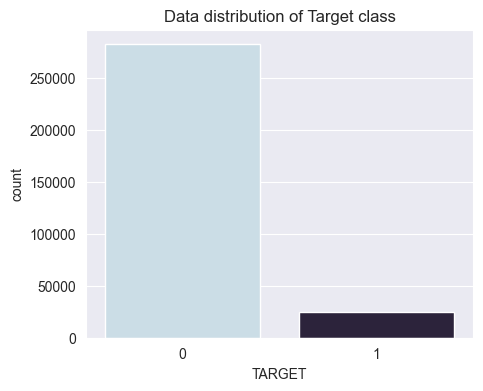

In [12]:
# Lets visualize data imbalance
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(5,4))
#fig = plt.figure(figsize = (5,4))
sns.countplot(ax=ax, x='TARGET', data=df, palette='ch:s=.25,rot=-.25').set(title='Data distribution of Target class')

**Preliminary Observations:**

1. Our dataset has 307511 rows with 122 columns with float, int and object data types.
2. The highest percentage of null values is 69.87 %, we are not going to drop the rows with missing values, we will find a way to handle them.
3. About 67 columns have missing values.
4. The target class is highly imbalanced.
5. The dataset has to be divided before any imputations/resampling.

array([[<AxesSubplot:title={'center':'SK_ID_CURR'}>,
        <AxesSubplot:title={'center':'TARGET'}>,
        <AxesSubplot:title={'center':'CNT_CHILDREN'}>,
        <AxesSubplot:title={'center':'DAYS_BIRTH'}>,
        <AxesSubplot:title={'center':'DAYS_EMPLOYED'}>,
        <AxesSubplot:title={'center':'DAYS_ID_PUBLISH'}>],
       [<AxesSubplot:title={'center':'FLAG_MOBIL'}>,
        <AxesSubplot:title={'center':'FLAG_EMP_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_WORK_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_CONT_MOBILE'}>,
        <AxesSubplot:title={'center':'FLAG_PHONE'}>,
        <AxesSubplot:title={'center':'FLAG_EMAIL'}>],
       [<AxesSubplot:title={'center':'REGION_RATING_CLIENT'}>,
        <AxesSubplot:title={'center':'REGION_RATING_CLIENT_W_CITY'}>,
        <AxesSubplot:title={'center':'HOUR_APPR_PROCESS_START'}>,
        <AxesSubplot:title={'center':'REG_REGION_NOT_LIVE_REGION'}>,
        <AxesSubplot:title={'center':'REG_REGION_NOT_WORK_REGION'}>,
    

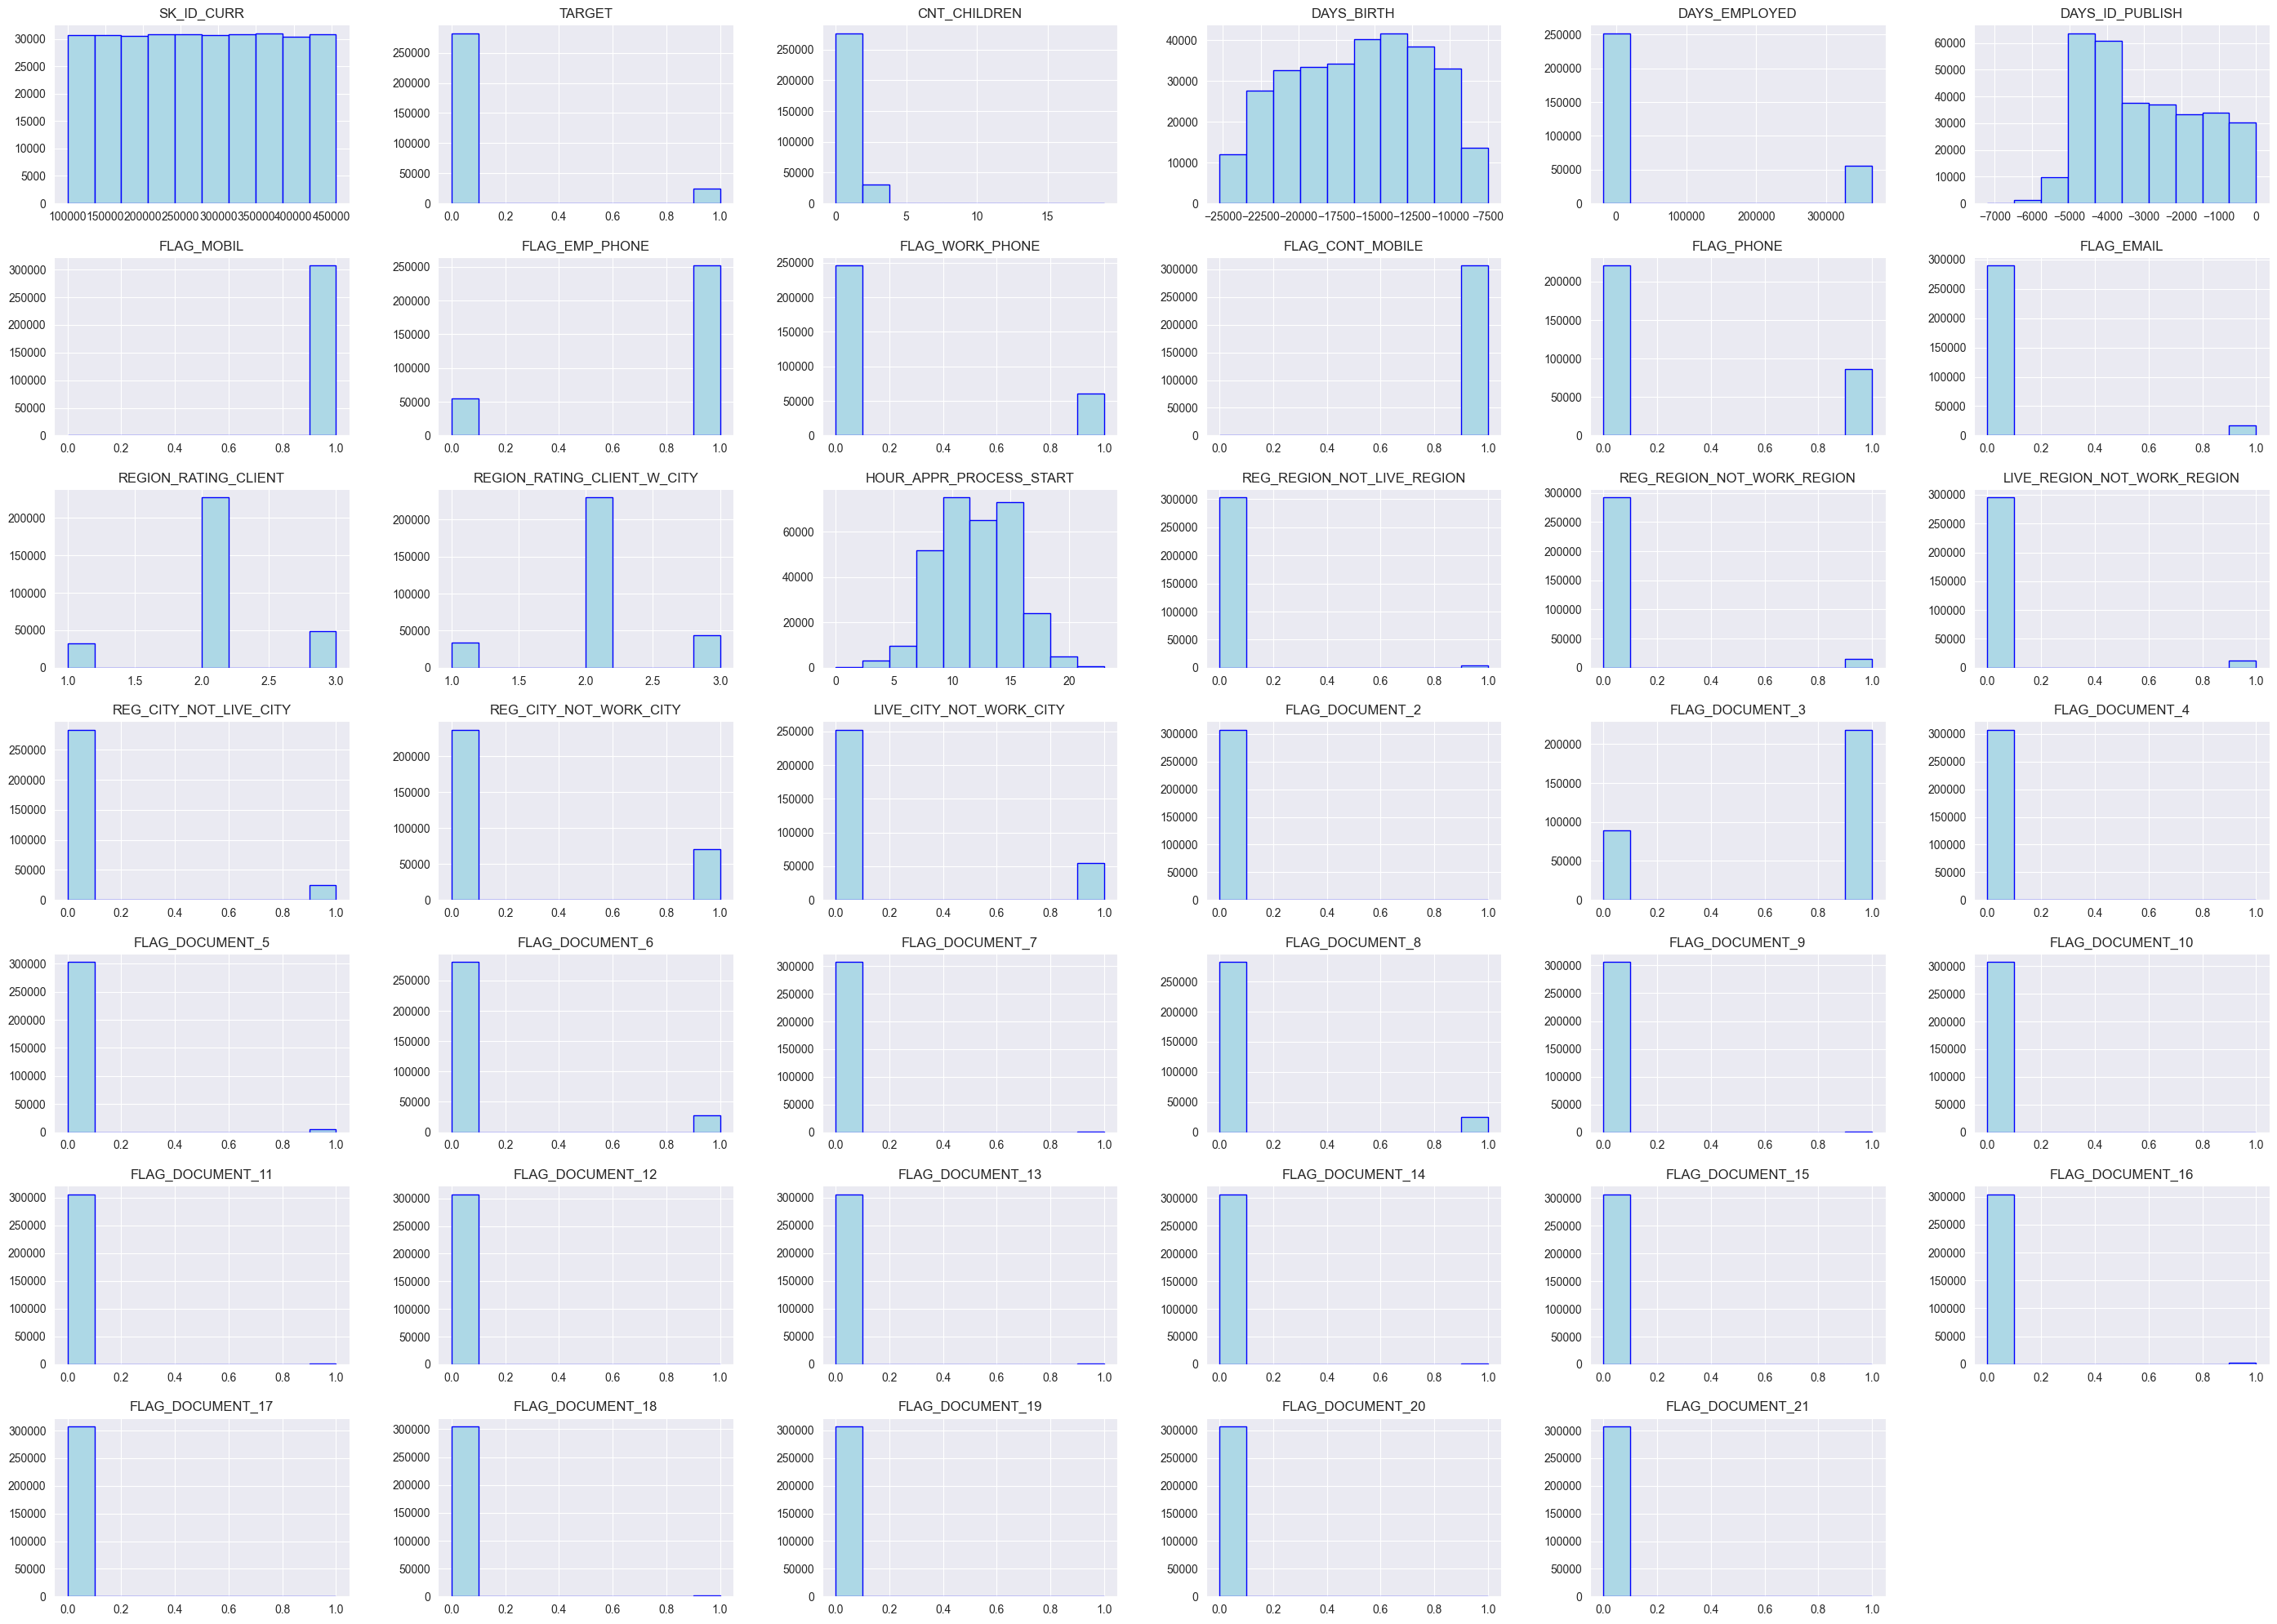

In [13]:
## To visualize data distribution, lets plot some graphs.
df.select_dtypes('int64').hist(figsize=(35,25),color = "lightblue", ec="blue")

In [14]:
df.select_dtypes('float64').hist(figsize=(100,95),color = "green", ec="blue")
plt.rcParams.update({'font.size': 32})

<AxesSubplot:xlabel='count', ylabel='ORGANIZATION_TYPE'>

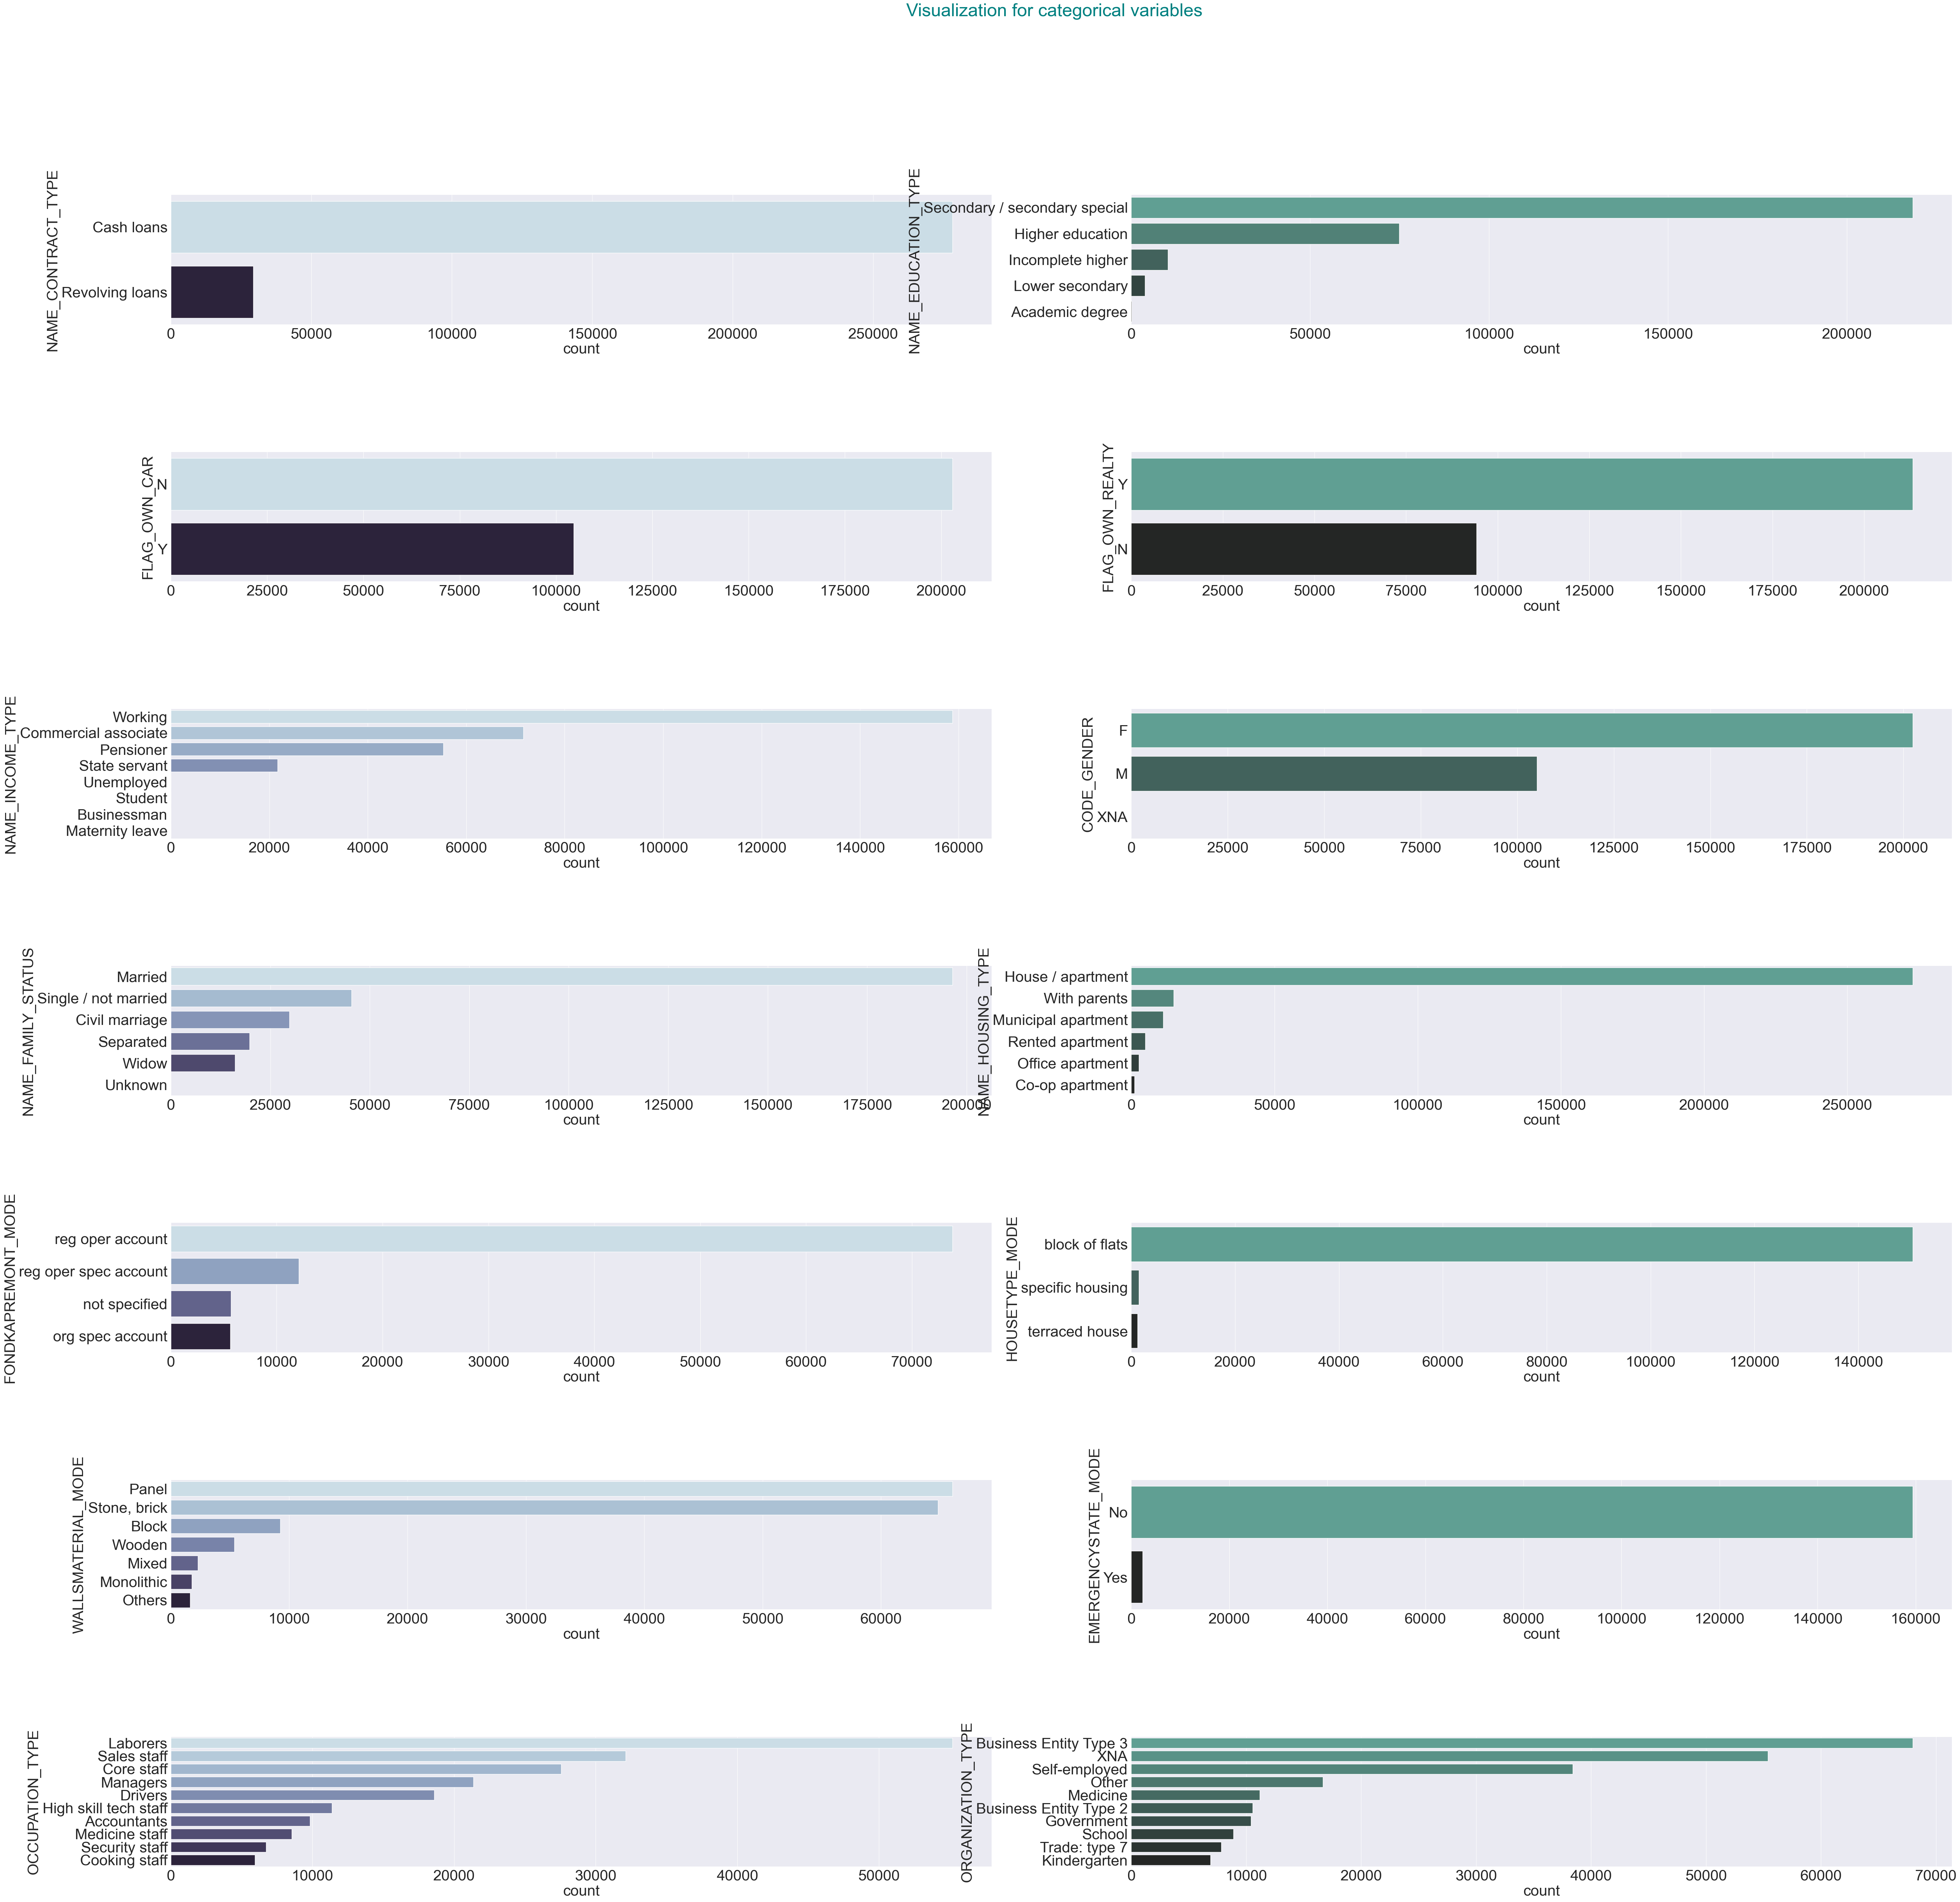

In [15]:
df_categorical = df[['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_INCOME_TYPE',
                    'NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE',
                     'ORGANIZATION_TYPE','FONDKAPREMONT_MODE','HOUSETYPE_MODE', 'WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']]

fig, axes = plt.subplots(7,2, figsize=(60,60))
fig.suptitle('Visualization for categorical variables', color= 'teal')
#plt.gcf().set_size_inches(80, 70)
fig.tight_layout(pad=7.0)
plt.rcParams.update({'font.size': 32})

sns.countplot(ax=axes[0,0], y = df_categorical['NAME_CONTRACT_TYPE'], data=df_categorical,order=df_categorical.NAME_CONTRACT_TYPE.value_counts().iloc[:10].index,palette='ch:s=.25,rot=-.25')
sns.countplot(ax=axes[0,1], y = df_categorical['NAME_EDUCATION_TYPE'],data=df_categorical,order=df_categorical.NAME_EDUCATION_TYPE.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[1,0], y = df_categorical['FLAG_OWN_CAR'],data=df_categorical,order=df_categorical.FLAG_OWN_CAR.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[1,1], y = df_categorical['FLAG_OWN_REALTY'],data=df_categorical,order=df_categorical.FLAG_OWN_REALTY.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[2,0], y = df_categorical['NAME_INCOME_TYPE'],data=df_categorical,order=df_categorical.NAME_INCOME_TYPE.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[2,1], y = df_categorical['CODE_GENDER'],data=df_categorical,order=df_categorical.CODE_GENDER.value_counts().iloc[:10].index, palette="dark:#5A9_r")
sns.countplot(ax=axes[3,0], y = df_categorical['NAME_FAMILY_STATUS'],data=df_categorical,order=df_categorical.NAME_FAMILY_STATUS.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[3,1], y = df_categorical['NAME_HOUSING_TYPE'],data=df_categorical,order=df_categorical.NAME_HOUSING_TYPE.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[4,0], y = df_categorical['FONDKAPREMONT_MODE'],data=df_categorical,order=df_categorical.FONDKAPREMONT_MODE.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[4,1], y = df_categorical['HOUSETYPE_MODE'],data=df_categorical,order=df_categorical.HOUSETYPE_MODE.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[5,0], y = df_categorical['WALLSMATERIAL_MODE'],data=df_categorical,order=df_categorical.WALLSMATERIAL_MODE.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[5,1], y = df_categorical['EMERGENCYSTATE_MODE'],data=df_categorical,order=df_categorical.EMERGENCYSTATE_MODE.value_counts().iloc[:10].index,palette="dark:#5A9_r")
sns.countplot(ax=axes[6,0], y = df_categorical['OCCUPATION_TYPE'],data=df_categorical, order=df_categorical.OCCUPATION_TYPE.value_counts().iloc[:10].index,palette="ch:s=.25,rot=-.25")
sns.countplot(ax=axes[6,1], y = df_categorical['ORGANIZATION_TYPE'],data=df_categorical,order=df_categorical.ORGANIZATION_TYPE.value_counts().iloc[:10].index, palette="dark:#5A9_r")

**General Observations**
1. There are more number of cash loans(cash is given to the borrower(individual or business) than revolving loans(once the debt is paid, the loan is renewed again, example:Credit cards are the best-known type of revolving credit.)
2. If the clients are segregrated based on education level, secondary education completed clients took the most number of loans.
3. Clients who do not own a car is at about 1:2 to ratio with clients who do and approximately the same with clients who own a realty.
4. Most of the clients are still working, followed by commercial associate, pensioner and state servant, in descending order.
5. Female clients are more than males.
6. Most of the clients are married.
7. The loans were taken mostly for a house/apartment type.
8. Laborers take up most loans.
9. Organization which takes the most number of loans is Business entity type 3.(business entity types: sole proprietorship, partnership, c corporation, s corporation, limited liability corporation(LLC).

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Accountants'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'Sales staff'),
  Text(6, 0, 'Cleaning staff'),
  Text(7, 0, 'Cooking staff'),
  Text(8, 0, 'Private service staff'),
  Text(9, 0, 'Medicine staff'),
  Text(10, 0, 'Security staff'),
  Text(11, 0, 'High skill tech staff'),
  Text(12, 0, 'Waiters/barmen staff'),
  Text(13, 0, 'Low-skill Laborers'),
  Text(14, 0, 'Realty agents'),
  Text(15, 0, 'Secretaries'),
  Text(16, 0, 'IT staff'),
  Text(17, 0, 'HR staff')])

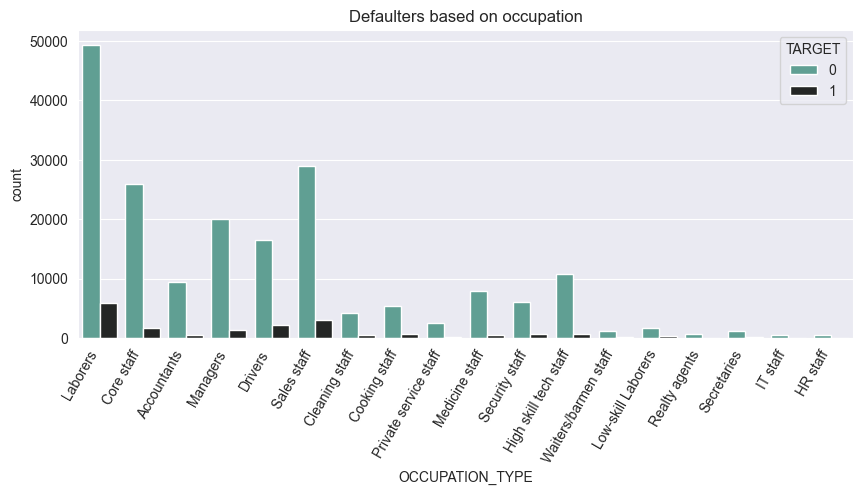

In [61]:
plt.figure(figsize=(10,4))
sns.countplot(x ='OCCUPATION_TYPE',hue = "TARGET", data = df, palette="dark:#5A9_r").set(title='Defaulters based on occupation')
#sns.lineplot(x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', data = df)
plt.xticks(rotation=60, ha='right')
#plt.rcParams.update({'font.size': 10})

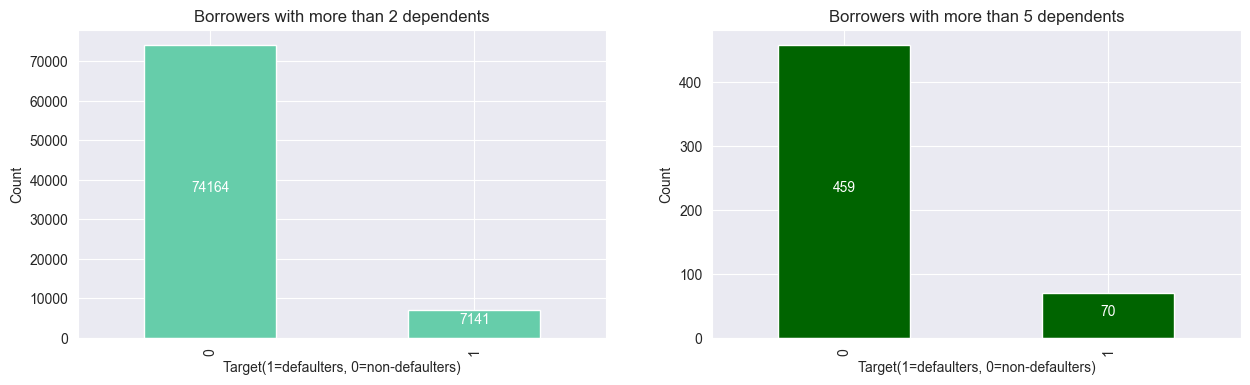

In [17]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))
df.query("CNT_FAM_MEMBERS  > 2")['TARGET'].value_counts().plot(kind='bar', ax=ax1, color = "mediumaquamarine")
ax1.set_title('Borrowers with more than 2 dependents')
ax1.set_xlabel('Target(1=defaulters, 0=non-defaulters)')
ax1.set_ylabel('Count')
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')
    
df.query("CNT_FAM_MEMBERS  > 5")['TARGET'].value_counts().plot(kind='bar', ax=ax2, color = "darkgreen")
ax2.set_title('Borrowers with more than 5 dependents')
ax2.set_xlabel('Target(1=defaulters, 0=non-defaulters)')
ax2.set_ylabel('Count')
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x()+p.get_width()/2.,
            height/2,
            '{}'.format(height),
            ha="center", color='white')

(-1.1075507062579233,
 1.1003595574408536,
 -1.1024402410610246,
 1.107700100013886)

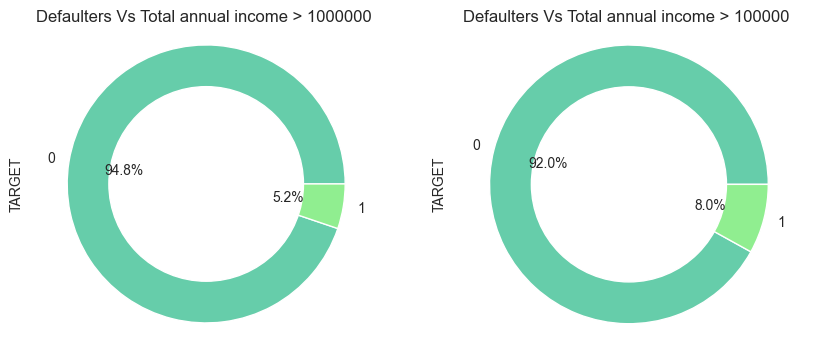

In [18]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))

df.query('AMT_INCOME_TOTAL>1000000')['TARGET'].value_counts().plot(kind='pie',autopct="%1.1f%%", colors = ["mediumaquamarine", 'lightgreen'], ax=ax1)
ax1.set_title('Defaulters Vs Total annual income > 1000000 ')

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax1.add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  


df.query('AMT_INCOME_TOTAL>100000')['TARGET'].value_counts().plot(kind='pie',autopct="%1.1f%%", colors = ["mediumaquamarine", 'lightgreen'], ax=ax2)
ax2.set_title('Defaulters Vs Total annual income > 100000 ')
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax2.add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax2.axis('equal') 

Text(0.5, 0, 'Age')

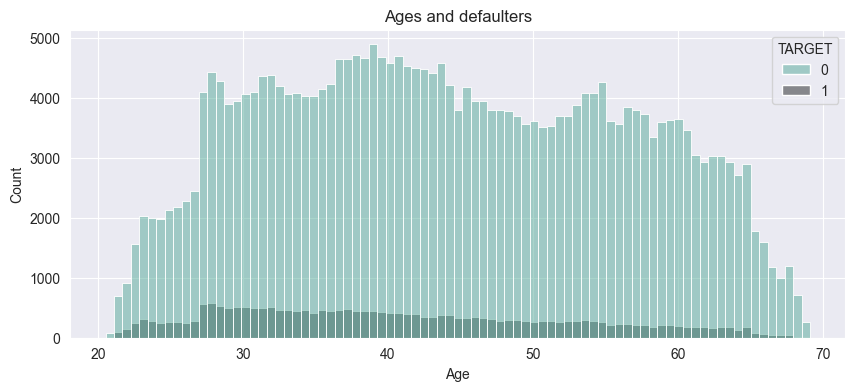

In [19]:
plt.figure(figsize=[10,4])
age = abs((df.DAYS_BIRTH)/365)
sns.histplot(x=age, hue='TARGET', data=df, palette="dark:#5A9_r").set(title='Ages and defaulters')
plt.xlabel('Age')

In [20]:

#plt.figure(figsize=[15,4])
#demploy = abs((df.DAYS_EMPLOYED)/365)
#sns.histplot(x=demploy, y='AMT_INCOME_TOTAL',hue='TARGET', data=df, palette="dark:#5A9_r").set(title='Total employed days Vs Total annual income')
#plt.xlabel('Total employed days')


In [21]:
# imbalance class resampling

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
# instantiating the random over sampler 
ros = RandomOverSampler()
# resampling X, y
X_ros, y_ros = ros.fit_resample(df.drop('TARGET', axis=1),df['TARGET'])
# new class distribution 
print(Counter(y_ros))

Counter({1: 282686, 0: 282686})


In [22]:
X_ros.shape, y_ros.shape

((565372, 121), (565372,))

In [23]:
ros_df = X_ros.merge(y_ros, left_index=True, right_index=True)

In [24]:
print('Dataset shape before oversampling technique:{}'.format(df.shape) )
print('Dataset shape after oversampling technique:{}'.format(ros_df.shape))

Dataset shape before oversampling technique:(307511, 122)
Dataset shape after oversampling technique:(565372, 122)


[Text(0.5, 1.0, 'Data distribution AFTER oversampling technique')]

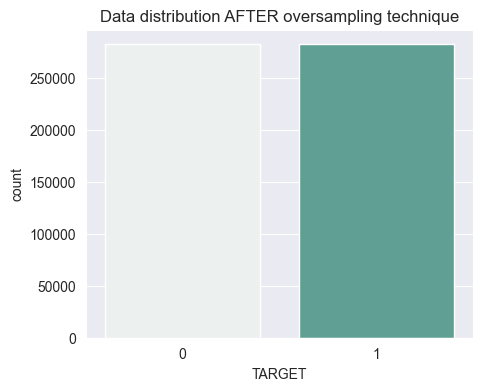

In [25]:
# creating the bar plot
fig = plt.figure(figsize = (5,4))
sns.countplot(x='TARGET', data=ros_df, palette="light:#5A9").set(title='Data distribution AFTER oversampling technique')

In [26]:
ros_df.groupby('TARGET').mean()

,SK_ID_CURR,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,278244.744536,0.412946,169077.722266,602648.282002,27163.623349,542736.795003,0.021021,-16138.176397,65696.146123,-5029.941065,-3017.219788,11.935540,0.999996,0.814653,0.195991,0.998129,0.284238,0.056840,2.150154,2.043578,2.022449,12.086807,0.014942,0.050317,0.040494,0.074641,0.22409,0.175856,0.511461,0.523479,0.520969,0.118314,0.088952,0.977893,0.753153,0.045005,0.080194,0.150249,0.228023,0.23337,0.066575,0.101405,0.108400,0.008850,0.028615,0.115036,0.088001,0.977225,0.760297,0.042885,0.075647,0.145673,0.224015,0.229493,0.065186,0.106268,0.106916,0.008096,0.027265,0.118721,0.088448,0.977916,0.756426,0.04498,0.079317,0.149735,0.227634,0.233097,0.067422,0.102582,0.109615,0.008687,0.028490,0.103507,1.415742,0.139148,1.398923,0.096688,-976.388294,0.000032,0.704060,0.000088,0.015126,0.090457,0.000198,0.082027,0.003976,0.000025,0.003990,0.000007,0.003729,0.003088,0.001277,0.010269,0.000283,0.008341,0.000605,0.000506,0.000315,0.006380,0.006914,0.034315,0.270697,0.265939,1.889199
1,277528.335407,0.465591,162693.376366,557640.533357,26455.324846,488901.684027,0.019092,-14876.526609,42410.510443,-4481.772016,-2729.923127,13.704756,1.000000,0.879442,0.238374,0.998132,0.244756,0.055471,2.182340,2.154504,2.135486,11.798462,0.017394,0.055185,0.042114,0.118382,0.30183,0.220566,0.386928,0.411167,0.391267,0.105110,0.081225,0.975568,0.742415,0.038890,0.061594,0.142484,0.202376,0.21129,0.062752,0.091087,0.093499,0.008243,0.024772,0.102824,0.081103,0.974872,0.749980,0.037597,0.058448,0.138585,0.199016,0.208115,0.061561,0.096155,0.092927,0.007783,0.023659,0.105504,0.080950,0.975512,0.745718,0.03884,0.060857,0.141987,0.202054,0.211057,0.063427,0.092285,0.094580,0.008155,0.024705,0.089142,1.501844,0.193710,1.483450,0.139729,-811.065076,0.000149,0.777375,0.000000,0.014868,0.061160,0.000138,0.074174,0.002954,0.000000,0.002897,0.000000,0.001203,0.001199,0.000520,0.005855,0.000088,0.005763,0.000467,0.000524,0.000534,0.006619,0.007876,0.034837,0.228429,0.259093,2.0230

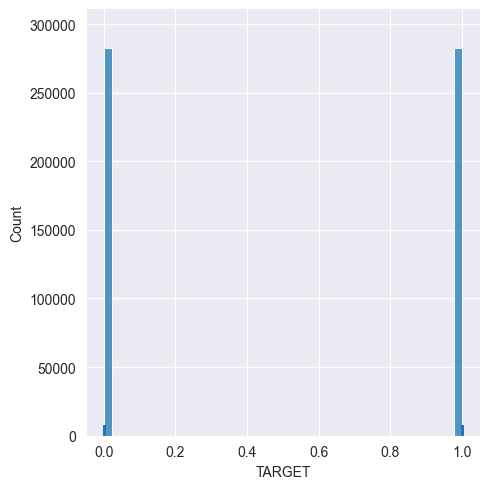

In [27]:
sns.displot(ros_df['TARGET'],rug=True)
plt.show()

In [28]:
# Lets divide the dataset into training and testing before any sort of imputations.

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(ros_df, test_size=0.2, random_state=25)
print(f"No. of training examples: {train_df.shape[0]}")
print(f"No. of testing examples: {test_df.shape[0]}")

No. of training examples: 452297
No. of testing examples: 113075


In [29]:
#Encode categorical/object data type

from sklearn import preprocessing

# Create a boolean mask for categorical columns
categorical_mask = (train_df.dtypes == object)

# Get list of categorical column names
categorical_columns = train_df.columns[categorical_mask].tolist()

# Create LabelEncoder object: le
le = preprocessing.LabelEncoder()

# Apply LabelEncoder to categorical columns
train_df[categorical_columns] = train_df[categorical_columns].apply(lambda x: le.fit_transform(x))

In [30]:
# Lets use simple imputer to replace nan values with mean.

# To calculate mean use imputer class
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
train_df = pd.DataFrame(imputer.fit_transform(train_df), columns = train_df.columns)
train_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,272849.0,0.0,0.0,1.0,0.0,2.0,112500.0,900000.0,46084.5,900000.0,1.0,4.0,1.0,1.0,5.0,0.006296,-10298.0,-987.0,-1919.0,-1901.0,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,3.0,3.0,0.0,16.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,0.731187,0.353345,0.202087,0.112347,0.085535,0.97678,0.748204,0.042209,0.071744,0.146737,0.216325,0.223252,0.064899,0.096747,0.101564,0.008656,0.026846,0.109542,0.084957,0.976109,0.755527,0.040472,0.067877,0.142471,0.212618,0.219685,0.063593,0.101728,0.100511,0.008031,0.025612,0.112751,0.085141,0.976767,0.751489,0.042181,0.07096,0.146243,0.215966,0.222997,0.065652,0.09794,0.102744,0.008524,0.026763,4.0,3.0,0.096883,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,1.0
1,419985.0,0.0,0.0,0.0,1.0,0.0,76500.0,168102.0,16753.5,148500.0,1.0,3.0,4.0,3.0,1.0,0.003122,-24754.0,365243.0,-7574.0,-4087.0,12.773304,1.0,0.0,0.0,1.0,0.0,0.0,18.0,1.0,3.0,3.0,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.867197,0.533181,0.457364,0.112347,0.085535,0.97678,0.748204,0.042209,0.071744,0.146737,0.216325,0.223252,0.064899,0.096747,0.101564,0.008656,0.026846,0.109542,0.084957,0.976109,0.755527,0.040472,0.067877,0.142471,0.212618,0.219685,0.063593,0.101728,0.100511,0.008031,0.025612,0.112751,0.085141,0.976767,0.751489,0.042181,0.07096,0.146243,0.215966,0.222997,0.065652,0.09794,0.102744,0.008524,0.026763,4.0,3.0,0.096883,7.0,2.0,0.0,0.0,0.0,0.0,-220.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006481,0.00743,0.034622,0.250765,0.262262,1.95455,0.0
2,344825.0,0.0,0.0,1.0,1.0,0.0,103500.0,225000.0,11488.5,225000.0,6.0,7.0,4.0,0.0,1.0,0.025164,-13235.0,-4881.0,-1643.0,-2954.0,4.000000,1.0,1.0,0.0,1.0,0.0,0.0,14.0,2.0,2.0,2.0,6.0,10.0,0.0,0.0,0.0,

In [31]:
train_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,272849.0,0.0,0.0,1.0,0.0,2.0,112500.0,900000.0,46084.5,900000.0,1.0,4.0,1.0,1.0,5.0,0.006296,-10298.0,-987.0,-1919.0,-1901.0,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,3.0,4.0,3.0,3.0,0.0,16.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0,0.731187,0.353345,0.202087,0.112347,0.085535,0.97678,0.748204,0.042209,0.071744,0.146737,0.216325,0.223252,0.064899,0.096747,0.101564,0.008656,0.026846,0.109542,0.084957,0.976109,0.755527,0.040472,0.067877,0.142471,0.212618,0.219685,0.063593,0.101728,0.100511,0.008031,0.025612,0.112751,0.085141,0.976767,0.751489,0.042181,0.07096,0.146243,0.215966,0.222997,0.065652,0.09794,0.102744,0.008524,0.026763,4.0,3.0,0.096883,7.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,1.00000,1.0
1,419985.0,0.0,0.0,0.0,1.0,0.0,76500.0,168102.0,16753.5,148500.0,1.0,3.0,4.0,3.0,1.0,0.003122,-24754.0,365243.0,-7574.0,-4087.0,12.773304,1.0,0.0,0.0,1.0,0.0,0.0,18.0,1.0,3.0,3.0,5.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,57.0,0.867197,0.533181,0.457364,0.112347,0.085535,0.97678,0.748204,0.042209,0.071744,0.146737,0.216325,0.223252,0.064899,0.096747,0.101564,0.008656,0.026846,0.109542,0.084957,0.976109,0.755527,0.040472,0.067877,0.142471,0.212618,0.219685,0.063593,0.101728,0.100511,0.008031,0.025612,0.112751,0.085141,0.976767,0.751489,0.042181,0.07096,0.146243,0.215966,0.222997,0.065652,0.09794,0.102744,0.008524,0.026763,4.0,3.0,0.096883,7.0,2.0,0.0,0.0,0.0,0.0,-220.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006481,0.00743,0.034622,0.250765,0.262262,1.95455,0.0
2,344825.0,0.0,0.0,1.0,1.0,0.0,103500.0,225000.0,11488.5,225000.0,6.0,7.0,4.0,0.0,1.0,0.025164,-13235.0,-4881.0,-1643.0,-2954.0,4.000000,1.0,1.0,0.0,1.0,0.0,0.0,14.0,2.0,2.0,2.0,6.0,10.0,0.0,0.0,0.0,

In [32]:
#Splitting X_features and y_target

X_features =train_df.drop('TARGET', axis=1)
y_target = train_df.TARGET

#Print the shapes of X_features and y_target
X_features.shape,y_target.shape

((452297, 121), (452297,))

In [33]:
# Splitting of training set
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.20, random_state=42) 

In [34]:
# Standardization of training set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  

In [35]:
# Setting up Neural Network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import keras
from keras.models import Sequential
from keras.layers import Dense
import warnings

In [36]:
model = Sequential()

# Adding the input layer and the first hidden layer
model.add(Dense(121, activation = 'relu', input_shape = (121,)))

# Adding the second hidden layer
model.add(Dense(64,  activation = 'relu'))

# Adding the third hidden layer
model.add(Dense(32,  activation = 'relu'))

# Adding the fourth hidden layer
model.add(Dense(16,  activation = 'relu'))

# Adding the fifth hidden layer
model.add(Dense(8,  activation = 'relu'))

# Adding the output layer
model.add(Dense(1, activation = 'sigmoid'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the model
model.fit(X_train, y_train,epochs=10, batch_size=10, verbose=1)

Epoch 1/10
36184/36184 [==============================] - 59s 2ms/step - loss: 0.5954 - accuracy: 0.6826
Epoch 2/10
36184/36184 [==============================] - 55s 2ms/step - loss: 0.5745 - accuracy: 0.6961
Epoch 3/10
36184/36184 [==============================] - 56s 2ms/step - loss: 0.5516 - accuracy: 0.7119
Epoch 4/10
36184/36184 [==============================] - 54s 1ms/step - loss: 0.5297 - accuracy: 0.7294
Epoch 5/10
36184/36184 [==============================] - 54s 1ms/step - loss: 0.5098 - accuracy: 0.7444
Epoch 6/10
36184/36184 [==============================] - 55s 2ms/step - loss: 0.4921 - accuracy: 0.7572
Epoch 7/10
36184/36184 [==============================] - 55s 2ms/step - loss: 0.4783 - accuracy: 0.7668
Epoch 8/10
36184/36184 [==============================] - 64s 2ms/step - loss: 0.4660 - accuracy: 0.7751
Epoch 9/10
36184/36184 [==============================] - 56s 2ms/step - loss: 0.4551 - accuracy: 0.7828
Epoch 10/10
36184/36184 [==============================

In [37]:
# Predicting the Test set results
y_pred = model.predict(X_test)

2827/2827 [==============================] - 3s 1ms/step


accuracy of the model:  0.7767521556489055


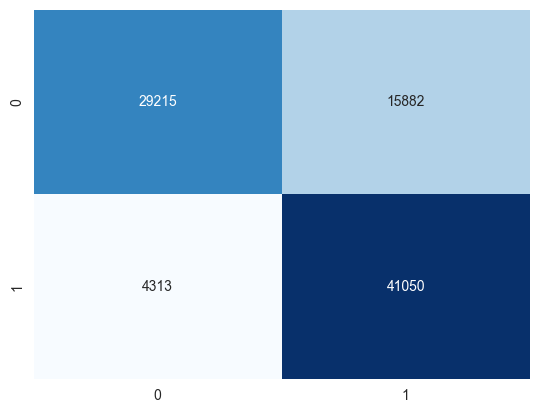

In [38]:
from sklearn.metrics import confusion_matrix, recall_score
cm = confusion_matrix(y_test, y_pred.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test, y_pred.round())
recall_score_NN = recall_score(y_test, y_pred.round())
print('accuracy of the model: ',ac)

<Figure size 640x480 with 0 Axes>

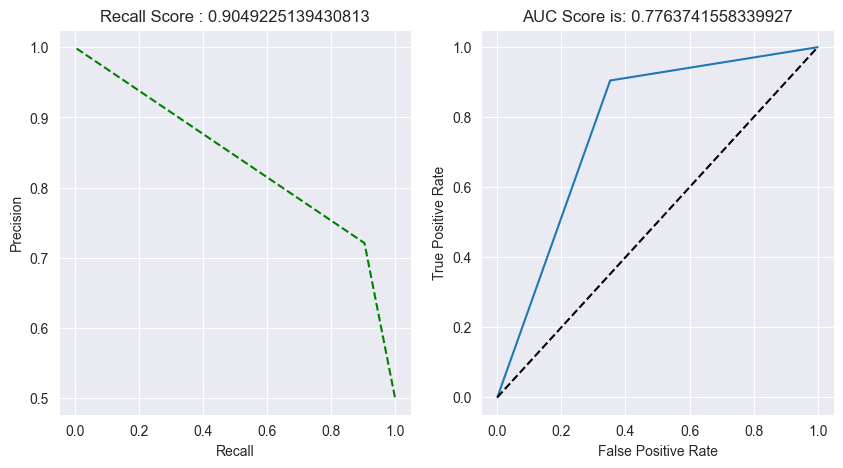

<Figure size 640x480 with 0 Axes>

In [39]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score, recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score

def plotting(true,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold = precision_recall_curve(true,pred)
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title("Recall Score : {}".format(recall_score(true,pred)))
    
    fpr,tpr,threshold = roc_curve(true,pred)
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is: {}".format(auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

plotting(y_test,y_pred.round())
plt.figure() 

In [40]:
# Classification report

from sklearn.metrics import classification_report

print(classification_report(y_pred.round(),y_test))

              precision    recall  f1-score   support

         0.0       0.65      0.87      0.74     33528
         1.0       0.90      0.72      0.80     56932

    accuracy                           0.78     90460
   macro avg       0.78      0.80      0.77     90460
weighted avg       0.81      0.78      0.78     90460



##### Our aim is to have  a high recall score. Our Neural Network model is not performing as well as expected. We will build a Random Forest model as below for comparison sake. 

RandomForest_accuracy: 0.9910015476453681


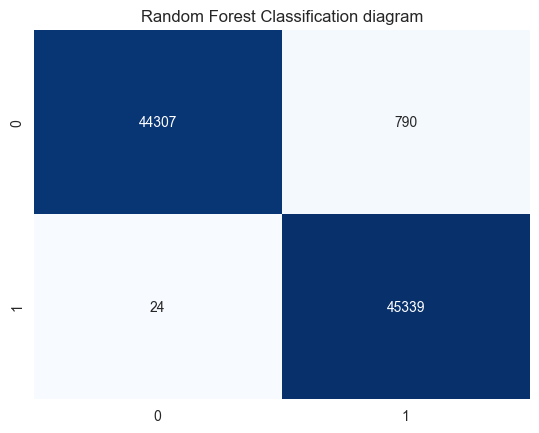

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_cm=confusion_matrix(y_test,rf_pred)
rf_ac=accuracy_score(rf_pred,y_test)
recall_score_RF = recall_score(rf_pred,y_test)
plt.title("Random Forest Classification diagram")
sns.heatmap(rf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rf_ac)

In [42]:
# Classification report
print(classification_report(rf_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     44331
         1.0       1.00      0.98      0.99     46129

    accuracy                           0.99     90460
   macro avg       0.99      0.99      0.99     90460
weighted avg       0.99      0.99      0.99     90460



<Figure size 640x480 with 0 Axes>

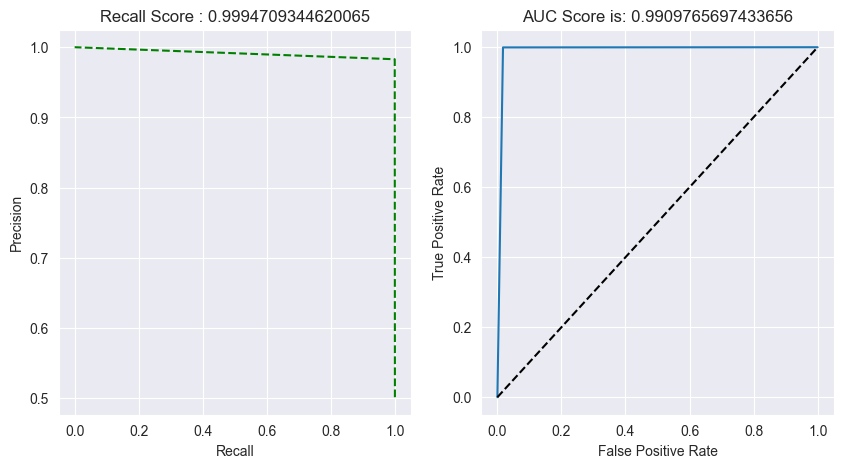

<Figure size 640x480 with 0 Axes>

In [43]:
plotting(y_test,rf.predict(X_test))
plt.figure() 

Text(0.5, 1.0, 'Model Recall Score of training dataset')

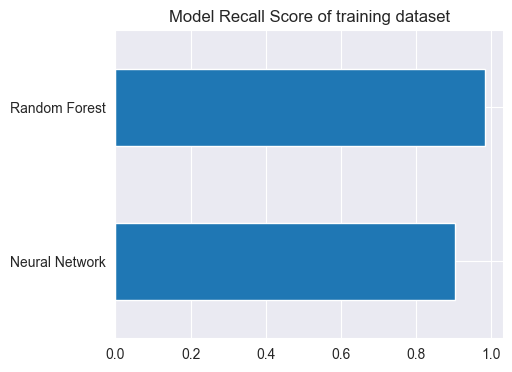

In [62]:
model_recall = pd.Series(data=[recall_score_NN,recall_score_RF], 
        index=['Neural Network','Random Forest'])
fig= plt.figure(figsize=(5,4))
model_recall.sort_values().plot.barh()
plt.title('Model Recall Score of training dataset')

#### Our random forest model has outperformed the neural network model. RF isnt necessarrily inferior to neural network model. There could be a few reasons why RF outperformed NN but it is evident that there is not a single model which works for all types of problems. Both approaches can handle complexity and overfitting issues but a study done by **[Ahmad, M.W.; Mourshed, M.; Rezgui, Y. (2017):Trees vs Neurons: Comparison between Random Forest and ANN for high-resolution prediction of building energy consumption. In: Energy andBuildings, volume 147, pp. 77–89.]**, Neural Networks are getting better when the complexity of the data set increases. Also, to note here, in the study, RF performed 90 percent better in achieving desirable  classification results.

In [45]:
## Testing both algorithms in our test data.
test_df.shape

(113075, 122)

In [46]:
# Preprocessing of test_df

# Create a boolean mask for categorical columns
categorical_mask = (test_df.dtypes == object)

# Get list of categorical column names
categorical_columns = test_df.columns[categorical_mask].tolist()

# Create LabelEncoder object: le
le = preprocessing.LabelEncoder()

# Apply LabelEncoder to categorical columns
test_df[categorical_columns] = test_df[categorical_columns].apply(lambda x: le.fit_transform(x))

In [47]:
# Lets use simple imputer to replace nan values with mean.

# To calculate mean use imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
test_df = pd.DataFrame(imputer.fit_transform(test_df), columns = test_df.columns)
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,TARGET
0,453736.0,0.0,0.0,0.0,1.0,0.0,57600.0,62554.5,7551.0,54000.0,6.0,7.0,4.0,1.0,5.0,0.018850,-10259.0,-643.0,-1634.0,-2549.0,12.755593,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,2.0,3.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,39.0,0.190843,0.165086,0.109626,0.111851,0.08497,0.976986,0.748482,0.042202,0.071498,0.146469,0.215859,0.223442,0.064481,0.096495,0.101413,0.00824,0.026919,0.108959,0.084419,0.976271,0.755869,0.040439,0.067429,0.142205,0.212137,0.219925,0.063214,0.101351,0.10031,0.007639,0.025648,0.112238,0.084551,0.976974,0.751775,0.042132,0.070566,0.145913,0.215504,0.223185,0.06531,0.097653,0.102463,0.008121,0.026758,4.0,3.0,0.096915,7.0,2.0,11.0,0.0,11.0,0.0,-1494.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
1,414644.0,0.0,0.0,0.0,1.0,0.0,90000.0,1060681.5,38227.5,805500.0,6.0,7.0,4.0,1.0,1.0,0.020713,-16899.0,-2774.0,-4389.0,-448.0,12.755593,1.0,1.0,0.0,1.0,0.0,0.0,6.0,2.0,3.0,2.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.599000,0.608651,0.782608,0.107200,0.12170,0.978100,0.700800,0.015000,0.000000,0.241400,0.166700,0.208300,0.041500,0.086600,0.100400,0.00390,0.006200,0.094500,0.108800,0.978200,0.712500,0.013800,0.000000,0.206900,0.166700,0.208300,0.042400,0.081700,0.09120,0.003900,0.004700,0.108300,0.121700,0.978100,0.704800,0.015100,0.000000,0.241400,0.166700,0.208300,0.04220,0.088100,0.102200,0.003900,0.006300,1.0,0.0,0.077300,4.0,0.0,1.0,1.0,1.0,1.0,-2508.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,3.0,0.0
2,445208.0,0.0,1.0,1.0,0.0,0.0,81000.0,90000.0,9693.0,90000.0,6.0,7.0,4.0,1.0,1.0,0.015221,-15513.0,-3216.0,-6653.0,-4826.0,24.000000,1.0,1.0,1.0,1.0,1.0,0.0,4.0,2.0,2.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,0.181033,0.089280,0.506484,0.057700,0.06640,0

In [48]:
# We will take the first 10 features identified by RFR.
X_test = test_df.drop('TARGET', axis=1)
y_test = np.ravel(test_df.TARGET)

In [49]:
X_test.shape,  y_test.shape

((113075, 121), (113075,))

In [50]:
# Splitting of training set
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X_test, y_test, test_size=0.20, random_state=42) 

In [51]:
# Standardization of training set

scaler = StandardScaler().fit(X_train_n)
X_train_n = scaler.transform(X_train_n)
X_test_n = scaler.transform(X_test_n)  

In [52]:
# Fitting the model
model.fit(X_train_n, y_train_n,epochs=10, batch_size=10, verbose=1)

Epoch 1/10
9046/9046 [==============================] - 18s 2ms/step - loss: 0.4707 - accuracy: 0.7715
Epoch 2/10
9046/9046 [==============================] - 16s 2ms/step - loss: 0.4520 - accuracy: 0.7839
Epoch 3/10
9046/9046 [==============================] - 17s 2ms/step - loss: 0.4412 - accuracy: 0.7913
Epoch 4/10
9046/9046 [==============================] - 21s 2ms/step - loss: 0.4319 - accuracy: 0.7974
Epoch 5/10
9046/9046 [==============================] - 20s 2ms/step - loss: 0.4234 - accuracy: 0.8038
Epoch 6/10
9046/9046 [==============================] - 17s 2ms/step - loss: 0.4177 - accuracy: 0.8067
Epoch 7/10
9046/9046 [==============================] - 19s 2ms/step - loss: 0.4126 - accuracy: 0.8099
Epoch 8/10
9046/9046 [==============================] - 20s 2ms/step - loss: 0.4070 - accuracy: 0.8139
Epoch 9/10
9046/9046 [==============================] - 18s 2ms/step - loss: 0.4019 - accuracy: 0.8168
Epoch 10/10
9046/9046 [==============================] - 24s 3ms/step - l

In [53]:
# Predicting the Test set results
y_pred_n = model.predict(X_test_n)

707/707 [==============================] - 1s 1ms/step


accuracy of the model:  0.7762546982091533


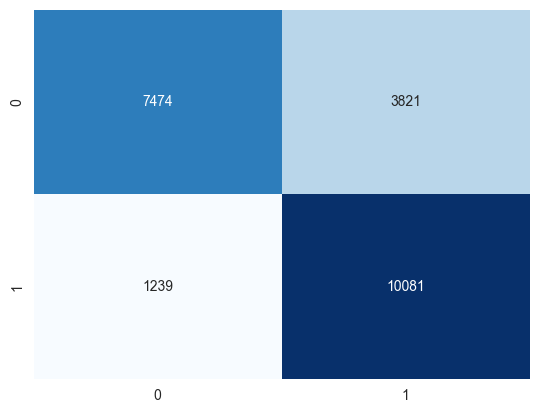

In [54]:
cm = confusion_matrix(y_test_n, y_pred_n.round())
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False)
#accuracy score
from sklearn.metrics import accuracy_score
ac_n=accuracy_score(y_test_n, y_pred_n.round())
recall_score_NN_test = recall_score(y_test_n, y_pred_n.round())
print('accuracy of the model: ',ac_n)

<Figure size 640x480 with 0 Axes>

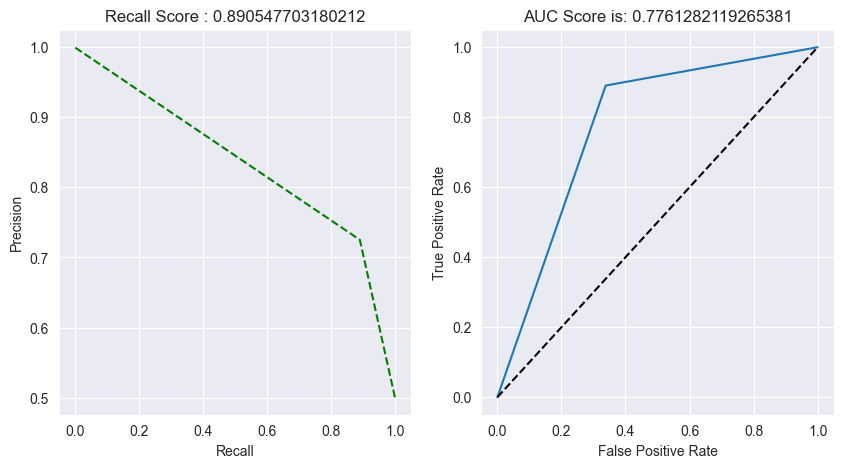

<Figure size 640x480 with 0 Axes>

In [55]:
plotting(y_test_n,y_pred_n.round())
plt.figure()

In [56]:
# Classification report
print(classification_report(y_pred_n.round(),y_test_n))

              precision    recall  f1-score   support

         0.0       0.66      0.86      0.75      8713
         1.0       0.89      0.73      0.80     13902

    accuracy                           0.78     22615
   macro avg       0.78      0.79      0.77     22615
weighted avg       0.80      0.78      0.78     22615



RandomForest_accuracy: 0.8731372982533716


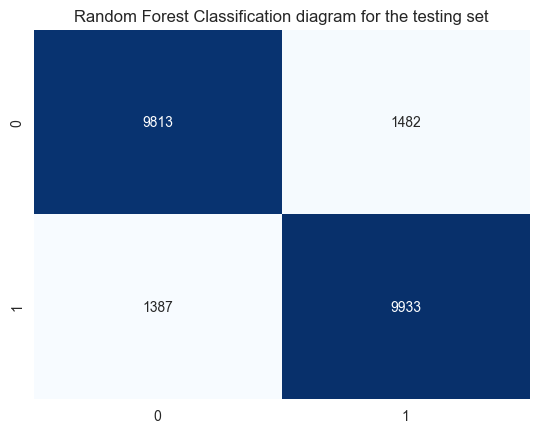

In [57]:
rf_n=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rf_n.fit(X_train_n,y_train_n)
rf_pred_n=rf_n.predict(X_test_n)
rf_cm_n=confusion_matrix(y_test_n,rf_pred_n)
rf_ac_n=accuracy_score(rf_pred_n,y_test_n)
recall_score_RF_test = recall_score(rf_pred_n,y_test_n)
plt.title("Random Forest Classification diagram for the testing set")
sns.heatmap(rf_cm_n,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rf_ac_n)

In [58]:
# Classification report

print(classification_report(rf_pred_n.round(),y_test_n))

              precision    recall  f1-score   support

         0.0       0.87      0.88      0.87     11200
         1.0       0.88      0.87      0.87     11415

    accuracy                           0.87     22615
   macro avg       0.87      0.87      0.87     22615
weighted avg       0.87      0.87      0.87     22615



<Figure size 640x480 with 0 Axes>

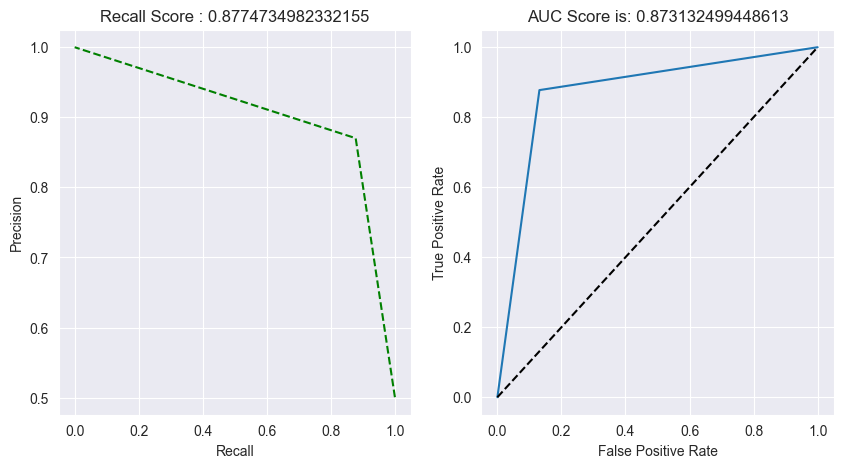

<Figure size 640x480 with 0 Axes>

In [59]:
plotting(y_test_n,rf_pred_n.round())
plt.figure()

Text(0.5, 1.0, 'Model Recall Score of training dataset')

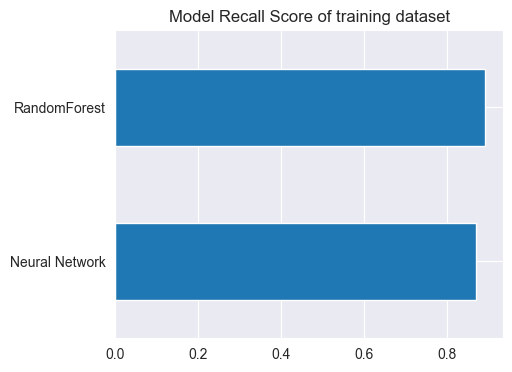

In [60]:
model_recall = pd.Series(data=[recall_score_NN_test,recall_score_RF_test], 
        index=['RandomForest','Neural Network'])
fig= plt.figure(figsize=(5,4))
model_recall.sort_values().plot.barh()
plt.title('Model Recall Score of training dataset')

#### With our testing dataset, the recall scores of RF is slightly better than NN.